In [14]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
def get_senti_result(pred_type):
    if pred_type not in ["senti_with_aspect", "senti_without_aspect"]:
        print("wrong pred type")
        return
    
    labels = ['negative', 'positive']
    label_mapping = {labels[i]:i for i in range(len(labels))}
    label_mapping_rev = {i:labels[i] for i in range(len(labels))}
    
    pred = pd.read_csv("bert_output_" + pred_type + "/test/test_results.tsv", sep="\t", header=None)
    pred["pred"] = pred.idxmax(axis=1)
    pred.columns = ["neg_prob", "pos_prob", "pred"]
    
    ans = pd.read_csv("data/dataset_test.csv", sep="\t", header=None)
    ans.columns = ["label", "aspect", "text"]

    res = pd.concat([pred, ans], axis=1)
    res["label"] = res["label"].apply(lambda x:label_mapping[x])

    print("{}, Random Guess: {}".format(pred_type, sum(res["label"]) / len(res["label"])))
    print("{}, Acc: {}".format(pred_type, accuracy_score(res["label"], res["pred"])))
    print("{}, F1: {}".format(pred_type, f1_score(res["label"], res["pred"])))
    
    return res, labels

In [18]:
def get_aspect_result():
    
    pred_type = 'aspect'
    labels = [u'功能', u'品质', u'设计', u'使用', u'服务', u'价格']
    label_mapping = {labels[i]:i for i in range(len(labels))}
    label_mapping_rev = {i:labels[i] for i in range(len(labels))}
    
    pred = pd.read_csv("bert_output_" + pred_type + "/test/test_results.tsv", sep="\t", header=None)
    pred["pred"] = pred.idxmax(axis=1)
    pred.columns = labels + ["pred"]

    ans = pd.read_csv("data/dataset_test.csv", sep="\t", header=None)
    ans.columns = ["label", "aspect", "text"]
        
    res = pd.concat([pred, ans], axis=1)
    res["aspect"] = res["aspect"].apply(lambda x:label_mapping[x])
    
    print("{}, Acc: {}".format(pred_type, accuracy_score(res["aspect"], res["pred"])))
    print("{}, F1 Micro: {}".format(pred_type, f1_score(res["aspect"], res["pred"], average='micro')))
    print("{}, F1 Macro: {}".format(pred_type, f1_score(res["aspect"], res["pred"], average='macro')))
    print("{}, F1 Weighted: {}".format(pred_type, f1_score(res["aspect"], res["pred"], average='weighted')))    

    
    return res, labels

In [4]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Sentiment with Aspect

In [28]:
res_senti_with_aspect, label_senti = get_senti_result("senti_with_aspect")

senti_with_aspect, Random Guess: 0.5683760683760684
senti_with_aspect, Acc: 0.8846153846153846
senti_with_aspect, F1: 0.8996282527881041


In [6]:
wrong_senti_with_aspect = res_senti_with_aspect[res_senti_with_aspect["pred"] != res_senti_with_aspect["label"]]
wrong_senti_with_aspect

,neg_prob,pos_prob,pred,label,aspect,text
2,0.010932,0.989068,1,0,品质,发热p880领先
24,0.076281,0.923719,1,0,使用,但是n4刷rom以后各种个性化的设置也是3星所没有的
26,0.630273,0.369727,0,1,品质,可视角度根本不是那些照片和黑子说的那样糟糕
30,0.002453,0.997547,1,0,品质,13.0的像素
31,0.996563,0.003437,0,1,品质,这么好看的外观为什么拍照效果十分一般？（其实算是不错，但是个人觉得配不上这个价位和外观应该有...
37,0.937921,0.062079,0,1,功能,9.系统ui操作切换
44,0.004612,0.995388,1,0,品质,但唯独细节部分组装还希望可以更进步
53,0.996173,0.003828,0,1,品质,色彩方面感觉36>iphone>26。(我的26是暖屛，不过也有好处，就是白色在晚上看不是很...
80,0.003714,0.996286,1,0,品质,丝毫没有三星屏幕那样的油腻
116,0.996242,0.003758,0,1,服务,无线方面感觉n7100接收要强点


In [7]:
right_senti_with_aspect = res_senti_with_aspect[res_senti_with_aspect["pred"] == res_senti_with_aspect["label"]]
right_senti_with_aspect

,neg_prob,pos_prob,pred,label,aspect,text
0,0.993535,0.006464,0,0,品质,照片跟视屏都是iphone3gs照的
1,0.001485,0.998515,1,1,功能,p880载入速度还是快过f160
3,0.001448,0.998552,1,1,品质,4.拍照跟屏幕f160相对好点
4,0.001448,0.998552,1,1,品质,4.拍照跟屏幕f160相对好点
5,0.004021,0.995979,1,1,品质,至于做工
6,0.994195,0.005805,0,0,品质,f160的缝隙
7,0.001418,0.998582,1,1,设计,感觉就是动画漂亮
8,0.001497,0.998503,1,1,功能,内存控制比4.04好
9,0.996712,0.003288,0,0,功能,游戏进入比较慢
10,0.001484,0.998516,1,1,品质,电源这点赞一个


# Sentiment without Aspect

In [29]:
res_senti_without_aspect, label_senti = get_senti_result("senti_without_aspect")

senti_without_aspect, Random Guess: 0.5683760683760684
senti_without_aspect, Acc: 0.8632478632478633
senti_without_aspect, F1: 0.8814814814814815


In [9]:
wrong_senti_without_aspect = res_senti_without_aspect[res_senti_without_aspect["pred"] != res_senti_without_aspect["label"]]
wrong_senti_without_aspect

,neg_prob,pos_prob,pred,label,aspect,text
0,0.008670,0.991330,1,0,品质,照片跟视屏都是iphone3gs照的
2,0.003878,0.996122,1,0,品质,发热p880领先
24,0.335450,0.664550,1,0,使用,但是n4刷rom以后各种个性化的设置也是3星所没有的
26,0.993598,0.006402,0,1,品质,可视角度根本不是那些照片和黑子说的那样糟糕
30,0.004894,0.995106,1,0,品质,13.0的像素
31,0.993304,0.006696,0,1,品质,这么好看的外观为什么拍照效果十分一般？（其实算是不错，但是个人觉得配不上这个价位和外观应该有...
37,0.993268,0.006732,0,1,功能,9.系统ui操作切换
44,0.006550,0.993450,1,0,品质,但唯独细节部分组装还希望可以更进步
53,0.996393,0.003607,0,1,品质,色彩方面感觉36>iphone>26。(我的26是暖屛，不过也有好处，就是白色在晚上看不是很...
80,0.031211,0.968789,1,0,品质,丝毫没有三星屏幕那样的油腻


In [10]:
right_senti_without_aspect = res_senti_without_aspect[res_senti_without_aspect["pred"] == res_senti_without_aspect["label"]]
right_senti_without_aspect

,neg_prob,pos_prob,pred,label,aspect,text
1,0.001975,0.998025,1,1,功能,p880载入速度还是快过f160
3,0.002940,0.997060,1,1,品质,4.拍照跟屏幕f160相对好点
4,0.002940,0.997060,1,1,品质,4.拍照跟屏幕f160相对好点
5,0.029350,0.970650,1,1,品质,至于做工
6,0.993572,0.006428,0,0,品质,f160的缝隙
7,0.001142,0.998858,1,1,设计,感觉就是动画漂亮
8,0.001916,0.998084,1,1,功能,内存控制比4.04好
9,0.997543,0.002457,0,0,功能,游戏进入比较慢
10,0.004180,0.995820,1,1,品质,电源这点赞一个
11,0.995611,0.004389,0,0,功能,电流快速耗干不知道什么问题


# Sentiment Comparison

In [11]:
wrong_both = wrong_senti_with_aspect.join(wrong_senti_without_aspect, how='inner', lsuffix='_with_aspect', rsuffix='_without_aspect')
wrong_both = wrong_both[["neg_prob_with_aspect", "pos_prob_with_aspect", "neg_prob_without_aspect", "pos_prob_without_aspect", "aspect_with_aspect", "text_with_aspect"]]
wrong_both

,neg_prob_with_aspect,pos_prob_with_aspect,neg_prob_without_aspect,pos_prob_without_aspect,aspect_with_aspect,text_with_aspect
2,0.010932,0.989068,0.003878,0.996122,品质,发热p880领先
24,0.076281,0.923719,0.335450,0.664550,使用,但是n4刷rom以后各种个性化的设置也是3星所没有的
26,0.630273,0.369727,0.993598,0.006402,品质,可视角度根本不是那些照片和黑子说的那样糟糕
30,0.002453,0.997547,0.004894,0.995106,品质,13.0的像素
31,0.996563,0.003437,0.993304,0.006696,品质,这么好看的外观为什么拍照效果十分一般？（其实算是不错，但是个人觉得配不上这个价位和外观应该有...
37,0.937921,0.062079,0.993268,0.006732,功能,9.系统ui操作切换
44,0.004612,0.995388,0.006550,0.993450,品质,但唯独细节部分组装还希望可以更进步
53,0.996173,0.003828,0.996393,0.003607,品质,色彩方面感觉36>iphone>26。(我的26是暖屛，不过也有好处，就是白色在晚上看不是很...
80,0.003714,0.996286,0.031211,0.968789,品质,丝毫没有三星屏幕那样的油腻
116,0.996242,0.003758,0.995475,0.004525,服务,无线方面感觉n7100接收要强点


In [12]:
wrong_senti_with_aspect_only = wrong_senti_with_aspect.join(wrong_senti_without_aspect, how='left', lsuffix='_with_aspect', rsuffix='without_aspect')
wrong_senti_with_aspect_only = wrong_senti_with_aspect_only.loc[wrong_senti_with_aspect_only["labelwithout_aspect"].isna(), :]
wrong_senti_with_aspect_only

,neg_prob_with_aspect,pos_prob_with_aspect,pred_with_aspect,label_with_aspect,aspect_with_aspect,text_with_aspect,neg_probwithout_aspect,pos_probwithout_aspect,predwithout_aspect,labelwithout_aspect,aspectwithout_aspect,textwithout_aspect
151,0.987784,0.012215,0,1,设计,1、手机外观虽然不过时,NaN,NaN,NaN,NaN,NaN,NaN
159,0.440754,0.559246,1,0,品质,8、做工概率问题就不再一一提及。（ps：未发现问题欢迎补充,NaN,NaN,NaN,NaN,NaN,NaN
178,0.984060,0.015940,0,1,品质,1屏幕,NaN,NaN,NaN,NaN,NaN,NaN
192,0.001665,0.998335,1,0,设计,重量轻,NaN,NaN,NaN,NaN,NaN,NaN
193,0.731959,0.268041,0,1,品质,不像图片所看到的那样生硬的感觉,NaN,NaN,NaN,NaN,NaN,NaN
218,0.904779,0.095221,0,1,功能,电池其实挺抗用的,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
wrong_senti_without_aspect_only = wrong_senti_without_aspect.join(wrong_senti_with_aspect, how='left', lsuffix='_without_aspect', rsuffix='with_aspect')
wrong_senti_without_aspect_only = wrong_senti_without_aspect_only.loc[wrong_senti_without_aspect_only["labelwith_aspect"].isna(), :]
wrong_senti_without_aspect_only

,neg_prob_without_aspect,pos_prob_without_aspect,pred_without_aspect,label_without_aspect,aspect_without_aspect,text_without_aspect,neg_probwith_aspect,pos_probwith_aspect,predwith_aspect,labelwith_aspect,aspectwith_aspect,textwith_aspect
0,0.008670,0.991330,1,0,品质,照片跟视屏都是iphone3gs照的,NaN,NaN,NaN,NaN,NaN,NaN
103,0.914197,0.085803,0,1,品质,n4比onex好很多(不知道是不是自动亮度低的关系,NaN,NaN,NaN,NaN,NaN,NaN
106,0.006045,0.993955,1,0,设计,外观没n7100的大气,NaN,NaN,NaN,NaN,NaN,NaN
113,0.008273,0.991726,1,0,功能,稍微要比n7100耗电快点,NaN,NaN,NaN,NaN,NaN,NaN
130,0.996754,0.003246,0,1,设计,外形确实有点大,NaN,NaN,NaN,NaN,NaN,NaN
142,0.991606,0.008394,0,1,设计,另外zl的机身比较小巧,NaN,NaN,NaN,NaN,NaN,NaN
163,0.949676,0.050324,0,1,品质,3、拍照没出现部分网友说的模糊严重问题,NaN,NaN,NaN,NaN,NaN,NaN
166,0.991942,0.008058,0,1,品质,这块防爆膜可能很坚固,NaN,NaN,NaN,NaN,NaN,NaN
204,0.003129,0.996871,1,0,功能,耗电量比屏幕的还高,NaN,NaN,NaN,NaN,NaN,NaN
207,0.013667,0.986333,1,0,使用,软件的人性化一般般,NaN,NaN,NaN,NaN,NaN,NaN


# Aspect

In [19]:
res_aspect, label_aspect = get_aspect_result()

aspect, Acc: 0.6495726495726496
aspect, F1 Micro: 0.6495726495726496
aspect, F1 Macro: 0.5077843225885433
aspect, F1 Weighted: 0.6302895134046079


In [15]:
wrong_aspect = res_aspect[res_aspect["pred"] != res_aspect["aspect"]]
wrong_aspect

,功能,品质,设计,使用,服务,价格,pred,label,aspect,text
2,0.478379,0.423622,0.025064,0.047989,0.015613,0.009333,0,negative,1,发热p880领先
11,0.159271,0.761066,0.016334,0.045507,0.010448,0.007374,1,negative,0,电流快速耗干不知道什么问题
20,0.880521,0.068016,0.022937,0.020568,0.005220,0.002738,0,negative,1,更不要拿n4的相机去和苹果sony的比
21,0.676790,0.247213,0.037190,0.022718,0.010975,0.005114,0,negative,1,照相差些
22,0.967193,0.010535,0.009542,0.006902,0.004343,0.001485,0,positive,1,系统好些
23,0.975371,0.004313,0.006035,0.007895,0.004588,0.001798,0,positive,3,当然s3的很多手势操作很人性化
24,0.024003,0.007675,0.955291,0.003944,0.006825,0.002262,2,negative,3,但是n4刷rom以后各种个性化的设置也是3星所没有的
26,0.287841,0.257959,0.434469,0.009899,0.006906,0.002927,2,positive,1,可视角度根本不是那些照片和黑子说的那样糟糕
31,0.923173,0.042234,0.008798,0.016892,0.004946,0.003957,0,positive,1,这么好看的外观为什么拍照效果十分一般？（其实算是不错，但是个人觉得配不上这个价位和外观应该有...
32,0.923173,0.042234,0.008798,0.016892,0.004946,0.003957,0,negative,1,这么好看的外观为什么拍照效果十分一般？（其实算是不错，但是个人觉得配不上这个价位和外观应该有...


In [16]:
right_aspect = res_aspect[res_aspect["pred"] == res_aspect["aspect"]]
right_aspect

,功能,品质,设计,使用,服务,价格,pred,label,aspect,text
0,0.075313,0.870734,0.024936,0.019806,0.005533,0.003678,1,negative,1,照片跟视屏都是iphone3gs照的
1,0.971714,0.006980,0.004856,0.009060,0.005536,0.001854,0,positive,0,p880载入速度还是快过f160
3,0.019596,0.941093,0.011953,0.017111,0.004272,0.005975,1,positive,1,4.拍照跟屏幕f160相对好点
4,0.019596,0.941093,0.011953,0.017111,0.004272,0.005975,1,positive,1,4.拍照跟屏幕f160相对好点
5,0.021380,0.917954,0.041860,0.011971,0.003643,0.003193,1,positive,1,至于做工
6,0.028480,0.901717,0.037922,0.022710,0.004606,0.004563,1,negative,1,f160的缝隙
7,0.319322,0.040092,0.620421,0.008137,0.008949,0.003077,2,positive,2,感觉就是动画漂亮
8,0.961418,0.012850,0.006365,0.010657,0.006775,0.001935,0,positive,0,内存控制比4.04好
9,0.973955,0.005483,0.004816,0.008245,0.005526,0.001976,0,negative,0,游戏进入比较慢
10,0.157998,0.774298,0.034835,0.023411,0.005914,0.003544,1,positive,1,电源这点赞一个


# Confusion Matriix

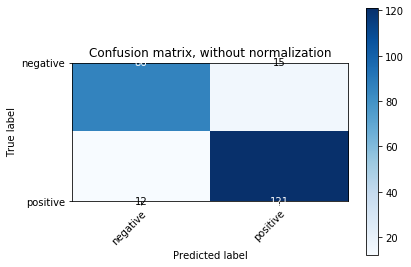

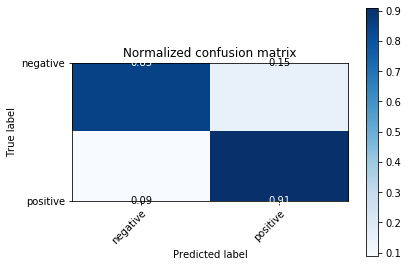

In [11]:
plot_confusion_matrix(res_senti_with_aspect["label"], res_senti_with_aspect["pred"], classes=label_senti)
plot_confusion_matrix(res_senti_with_aspect["label"], res_senti_with_aspect["pred"], classes=label_senti, normalize=True)
plt.show()

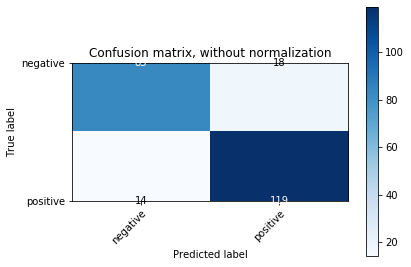

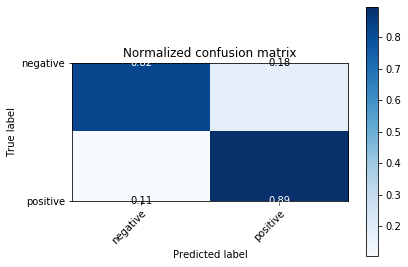

In [12]:
plot_confusion_matrix(res_senti_without_aspect["label"], res_senti_without_aspect["pred"], classes=label_senti)
plot_confusion_matrix(res_senti_without_aspect["label"], res_senti_without_aspect["pred"], classes=label_senti, normalize=True)
plt.show()

In [22]:
label_aspect_eng = ["Function", "Quality", "Design", "Usage", "Service", "Price"]

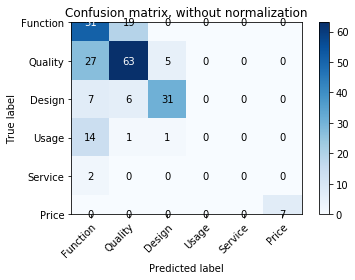

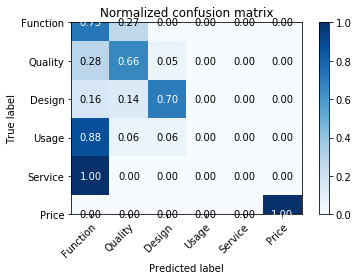

In [24]:
plot_confusion_matrix(res_aspect["aspect"], res_aspect["pred"], classes=label_aspect_eng)
plot_confusion_matrix(res_aspect["aspect"], res_aspect["pred"], classes=label_aspect_eng, normalize=True)
plt.show()

# LOG

In [17]:
print("{}, Acc: {}".format(PRED_TYPE, accuracy_score(res["label"], res["pred"])))
print("{}, F1: {}".format(PRED_TYPE, f1_score(res["label"], res["pred"])))

senti_without_aspect, Acc: 0.8632478632478633
senti_without_aspect, F1: 0.8814814814814815


In [23]:
print("{}, Acc: {}".format(PRED_TYPE, accuracy_score(res["label"], res["pred"])))
print("{}, F1: {}".format(PRED_TYPE, f1_score(res["label"], res["pred"])))

senti_with_aspect, Acc: 0.9017094017094017
senti_with_aspect, F1: 0.9151291512915128
